In [1]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D,MaxPooling2D, UpSampling2D, Flatten, Reshape 
import matplotlib.pyplot as plt 
import numpy as np 

(x_train,_), (x_test,_) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255

autoencoder = Sequential()

autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same'))

#디코더부분

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())

autoencoder.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)         

In [2]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=32)
validation_data = x_test,x_test


Epoch 1/50

1875/1875 [==============================] - 64s 33ms/step - loss: 0.2248
Epoch 2/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1902
Epoch 3/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1745
Epoch 4/50
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1655
Epoch 5/50
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1707
Epoch 6/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1583
Epoch 7/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1605
Epoch 8/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1648
Epoch 9/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1518
Epoch 10/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1590
Epoch 11/50
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1571
Epoch 12/50
1875/1875 [==============================] - 34s 

313/313 [==============================] - 2s 6ms/step


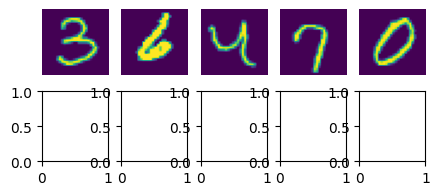

In [4]:
random_test = np.random.randint(x_test.shape[0], size=5 )
ae_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
    ax=plt.subplot(2,7,i+1)
    plt.imshow(x_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax=plt.subplot(2,7,7+i+1)